# Empirical Analysis of Fibonacci Algorithms

The Fibonacci sequence is a well-known mathematical concept that has applications in various fields, including computer science, finance, and nature. In this notebook, we will explore different algorithms for computing the Fibonacci sequence and analyze their performance characteristics.

## **0. Importing Required Libraries**

The following libraries are imported to facilitate the implementation and analysis of the Fibonacci algorithms:

- `gc`: Used for garbage collection to manage memory.
- `os`: Provides functions to interact with the operating system, such as file path manipulations.
- `time`: Used for measuring the execution time of the algorithms.
- `matplotlib.pyplot`: Used for plotting graphs to visualize the performance of the algorithms.
- `numpy`: Provides support for numerical operations, including the calculation of Binet's formula.
- `pandas`: Utilized for creating and manipulating dataframes to store and analyze results.
- `IPython.display`: Facilitates the display of widgets and other outputs in the notebook.
- `tqdm.notebook`: Used for creating progress bars to track the progress of the experiments.
- `decimal`: Provides support for fast and correctly-rounded decimal floating point arithmetic.

In [1]:
import gc
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm.notebook import tqdm
from decimal import Decimal, getcontext
from src.timing import measure_execution_time

In [2]:
directory_path = "result"
plots_path = f"{directory_path}/plots"

## **1. Introduction**
The Fibonacci sequence is a fundamental mathematical concept with applications in computer science, cryptography, and numerical analysis. It is defined recursively as:

$$
F(n) =
\begin{cases}
    0, & n = 0 \\
    1, & n = 1 \\
    F(n-1) + F(n-2), & n \geq 2
\end{cases}
$$

Computing the Fibonacci sequence efficiently is crucial in algorithm design, as different methods exhibit varying performance characteristics. This study aims to empirically analyze and compare six different approaches to computing the Fibonacci sequence in terms of execution time.

## **2. Objectives**
The primary objectives of this laboratory work are:
- To implement and compare eight Fibonacci algorithms.
- To analyze the empirical performance of each algorithm.
- To determine the most efficient method for different input sizes.
- To visualize execution time trends using graphical representations.

## **3. Implementing Fibonacci Methods**

The following eight methods for computing the Fibonacci sequence are implemented and analyzed:

### **3.1 Naïve Recursive Approach (Exponential $O(2^n)$)**
This method directly implements the recursive Fibonacci formula.

- **Inefficient for large $n$** due to redundant calculations.
- Demonstrates **exponential time complexity**.

> **Time Complexity**: $O(2^n)$ - Exponential
>
> **Space Complexity**: $O(n)$ - Due to recursive call stack


In [3]:
def fib_recursive(n):
    if n > 35:
        return -1
    if n <= 1:
        return n
    return fib_recursive(n - 1) + fib_recursive(n - 2)

In [4]:
# Test the recursive function with n = 10
print(fib_recursive(10))  # Output: 55

55


### **3.2 Recursive with Memoization (Top-Down DP, $O(n)$)**

This method avoids redundant calculations by storing previously computed values. It uses a dictionary to store Fibonacci values, reducing time complexity from $O(2^n)$ to $O(n)$.

- Stores previously computed values to avoid redundant calculations.
- Significantly improves efficiency over naive recursion.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(n)$ - Due to recursive call stack and memoization dictionary

In [5]:
def fib_memoized(n, memo=None):
    if n > 2000:
        return -1
    if memo is None:
        memo = {}
    if n in memo:
        return memo[n]
    if n <= 1:
        return n
    memo[n] = fib_memoized(n - 1, memo) + fib_memoized(n - 2, memo)
    return memo[n]

In [6]:
# Test the memoized function with n = 10
print(fib_memoized(10))  # Output: 55

55


### **3.3 Iterative Dynamic Programming (Bottom-Up DP, $O(n)$)**

This method builds the Fibonacci sequence iteratively, avoiding recursion overhead. It uses a list to store computed values, reducing time complexity to $O(n)$.

- Builds the Fibonacci sequence iteratively using an array.
- Eliminates recursion overhead but uses $O(n)$ space.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(n)$ - Due to storing computed Fibonacci values

In [7]:
def fib_iterative(n):
    if n <= 1:
        return n
    fib = [0, 1]
    for i in range(2, n + 1):
        fib.append(fib[i - 1] + fib[i - 2])
    return fib[n]

In [8]:
# Test the iterative function with n = 10
print(fib_iterative(10))  # Output: 55

55


### **3.4 Matrix Exponentiation (Logarithmic $O(\log n)$)**

This method leverages matrix multiplication to achieve an efficient \(O(\log n)\) complexity. Based on the transformation:

$$
\begin{bmatrix}
F(n) \\
F(n-1)
\end{bmatrix}
=
\begin{bmatrix}
0 & 1 \\
1 & 1
\end{bmatrix}^n
\cdot
\begin{bmatrix}
F(0) \\
F(1)
\end{bmatrix}
$$

- Uses matrix multiplication to compute Fibonacci numbers efficiently.
- Well-suited for very large values of \(n\).

> **Time Complexity**: $O(\log n)$ - Due to matrix exponentiation
>
> **Space Complexity**: $O(1)$ - Constant space

In [9]:
def fib_matrix(n):
    def matrix_mult(A, B):
        return np.dot(A, B).tolist()

    def matrix_power(matrix, p):
        if p == 1:
            return matrix
        if p % 2 == 0:
            half_pow = matrix_power(matrix, p // 2)
            return matrix_mult(half_pow, half_pow)
        else:
            return matrix_mult(matrix, matrix_power(matrix, p - 1))

    base_matrix = [[0, 1], [1, 1]]
    result = matrix_power(base_matrix, n)
    return result[0][1]

In [10]:
# Test the matrix exponentiation function with n = 10
print(fib_matrix(10))  # Output: 55

55


### **3.5 Binet’s Formula (Constant $O(1)$)**

This method directly computes Fibonacci numbers using the Golden Ratio (Phi). While computationally $O(1)$, floating-point precision errors make it unreliable for large $n$. Based on the formula:

$$
F(n) = \frac{\varphi^n - (-\varphi)^{-n}}{\sqrt{5}}
$$

- Uses the closed-form equation derived from the Golden Ratio.
- Extremely fast but suffers from precision errors for large $n$.

> **Time Complexity**: $O(1)$ - Constant
>
> **Space Complexity**: $O(1)$ - Constant

In [11]:
def fib_binet(n):
    if n > 70:
        return -1
    phi = (1 + np.sqrt(5)) / 2
    psi = (1 - np.sqrt(5)) / 2
    return int((phi ** n - psi ** n) / np.sqrt(5))

In [12]:
# Test the Binet's formula function with n = 10
print(fib_binet(10))  # Output: 55

55


### **3.6 Binet's Formula with Decimal Precision (Constant $O(1)$)**

To address the precision issues associated with floating-point arithmetic, the `decimal` module is used to compute Fibonacci numbers with higher precision. This approach is more reliable for large values of $n$. The precision is set to $n + 10$ to ensure accurate results.

- Uses the `decimal` module for higher precision arithmetic.
- Precision set to $n + 10$ to avoid floating-point errors.

> **Time Complexity**: $O(1)$ - Constant
>
> **Space Complexity**: $O(1)$ - Constant

In [13]:
def fib_binet_decimal(n):
    if n > 1000:
        return -1
    getcontext().prec = n + 10  # Set precision
    sqrt5 = Decimal(5).sqrt()
    phi = (1 + sqrt5) / 2
    psi = (1 - sqrt5) / 2
    return int((phi ** n - psi ** n) / sqrt5)

In [14]:
# Test the Binet's formula with decimal function with n = 10
print(fib_binet_decimal(10))  # Output: 55

54


### **3.7 Optimized Iterative Approach ($O(n)$ Time, $O(1)$ Space)**

This method only stores the last two computed values, reducing space complexity to $O(1)$. Efficient for computing Fibonacci numbers for large values of $n$.

- Iterative method storing only the last two computed values.
- The most memory-efficient approach while maintaining linear time complexity.

> **Time Complexity**: $O(n)$ - Linear
>
> **Space Complexity**: $O(1)$ - Constant

In [15]:
def fib_optimized(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

In [16]:
# Test the optimized iterative function with n = 10
print(fib_optimized(10))  # Output: 55

55


### **3.8 Fast Doubling Method (Logarithmic $O(\log n)$)**
This method uses a fast doubling technique to compute Fibonacci numbers with logarithmic complexity. It is based on the following recursive formula:

$$
\begin{align*}
F(2k) & = F(k) \cdot [2 \cdot F(k+1) - F(k)] \\
F(2k+1) & = F(k+1)^2 + F(k)^2
\end{align*}
$$

- Utilizes a fast doubling technique to compute Fibonacci numbers.
- Achieves logarithmic time complexity $O(\log n)$.

> **Time Complexity**: $O(\log n)$ - Logarithmic
>
> **Space Complexity**: $O(\log n)$ - Recursive call stack

In [17]:
def fib_fast_doubling(n):
    def fib_doubling(k):
        if k == 0:
            return 0, 1
        else:
            a, b = fib_doubling(k // 2)
            c = a * ((b << 1) - a)
            d = a * a + b * b
            if k & 1:
                return d, c + d
            else:
                return c, d
    return fib_doubling(n)[0]

In [18]:
# Test the fast doubling function with n = 10
print(fib_fast_doubling(10))  # Output: 55

55


## **4. Experimental Setup**

The empirical analysis of Fibonacci algorithms involves the following steps:
1. **Input Values**: Define small and large sets for testing.
2. **Performance Measurement**: Measure the execution time of each algorithm for different input sizes using Python’s `time` module.
3. **Results Analysis**: Compare the performance of the algorithms using tables and graphs generated with the `pandas` and `matplotlib` libraries.

In [19]:
fib_methods = {
    "Recursive": fib_recursive,
    "Memoized": fib_memoized,
    "Iterative DP": fib_iterative,
    "Matrix Exp": fib_matrix,
    "Binet": fib_binet,
    "Binet Decimal": fib_binet_decimal,
    "Iterative O(1)": fib_optimized,
    "Fast Doubling": fib_fast_doubling
}

### **4.1 Input Values**

The algorithms are tested on two sets of input values:

- **Small Input Set**: $n = {1, 2, 3, \ldots, 198}$
  - Used to verify correctness and evaluate all eight methods. This set includes small to moderately sized inputs to ensure that each algorithm produces accurate results and to observe their performance on smaller scales.

- **Large Input Set**: $n = {200, 300, 400, \ldots, 20000}$
  - Used to test the performance of fast methods. This set includes larger input sizes to evaluate the efficiency and scalability of the algorithms, particularly those designed to handle large values efficiently.

In [20]:
# Default input values for testing
small_inputs = list(range(1, 199, 1))
large_inputs = list(range(200, 20001, 100))
test_inputs = small_inputs + large_inputs

### **4.2 Performance Measurement**

To accurately measure the performance of each Fibonacci algorithm, the following steps are taken:

1. **Execution Time Measurement**:
   - The execution time for each method is measured using Python’s `time` module.
   - The `time.perf_counter_ns()` function is used to capture the start and end times in nanoseconds for high precision.

2. **Warm-up Runs**:
   - Each method is executed a few times (default is 3) before the actual measurement to ensure that any initial setup overhead is minimized.

3. **Multiple Trials**:
   - Each method is tested multiple times (default is 10 trials) to obtain a reliable average execution time.
   - The results from these trials are collected and analyzed to filter out any outliers.

4. **Outlier Filtering**:
   - Modified Z-scores and Interquartile Range (IQR) methods are used to identify and remove outliers from the collected execution times.
   - This ensures that the reported execution times are not skewed by anomalous measurements.

5. **Result Storage**:
   - The execution times are stored in a structured table using the `pandas` library.
   - This allows for easy manipulation and analysis of the results.

The following code snippet demonstrates the implementation of the performance measurement process:

In [21]:
# Test the performance measurement function
def test_fibonacci_performance(test_values, trials=10):
    results = []

    with tqdm(test_values, desc="Testing N values", unit="n") as pbar:
        for n in pbar:
            row = {"N": n}
            gc.collect()  # Clean up memory before each N

            pbar.set_description(f"N={n}")

            for name, func in fib_methods.items():
                try:
                    result, exec_time = measure_execution_time(func, n, trials=trials)
                    row[name] = "OVERFLOW" if result == "OVERFLOW" else exec_time
                except Exception as e:
                    print(f"\nError with {name} for n={n}: {e}")
                    row[name] = "ERROR"

            results.append(row)

    return pd.DataFrame(results)

## **5. Results and Analysis**

The performance of the Fibonacci algorithms is evaluated based on the execution time for different input sizes. The results are presented in tabular format and visualized using graphs to highlight the trends.

In [22]:
# Run performance test
df_results = test_fibonacci_performance(test_inputs)

Testing N values:   0%|          | 0/397 [00:00<?, ?n/s]

### **5.1 Execution Time Table**

The table below presents the execution time (in nanoseconds) for each algorithm.
> *Overflow = Too slow to complete or floating-point precision exceeded)*

In [23]:
# Display results in tabular format
display(df_results)

,N,Recursive,Memoized,Iterative DP,Matrix Exp,Binet,Binet Decimal,Iterative O(1),Fast Doubling
0,1,83.5,167.0,83.0,333.0,1770.5,1334.0,83.0,229.5
1,2,166.0,208.0,167.0,2667.0,1625.0,1146.0,125.0,291.5
2,3,208.0,334.0,229.5,5021.0,1750.0,1270.5,166.0,375.0
3,4,334.0,458.0,250.0,4478.5,1542.0,1145.5,167.0,417.0
4,5,500.0,542.0,250.0,5708.0,1708.0,1334.0,167.0,416.0
...,...,...,...,...,...,...,...,...,...
392,19600,OVERFLOW,OVERFLOW,5778167.0,40229.5,OVERFLOW,OVERFLOW,4273292.0,120687.5
393,19700,OVERFLOW,OVERFLOW,6154083.0,54521.0,OVERFLOW,OVERFLOW,4442437.0,121521.0
394,19800,OVERFLOW,OVERFLOW,6292458.0,53042.0,OVERFLOW,OVERFLOW,4352750.0,124729.5
395,19900,OVERFLOW,OVERFLOW,6449875.0,61166.5,OVERFLOW,OVERFLOW,4447333.0,124459.0


In [24]:
# Check or create directory
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [25]:
# Create a directory to store the results
create_directory("result")

In [26]:
# Function to export results to a CSV file
def export_results(df, path):
    filename = f"{path}/fibonacci_results.csv"
    df.to_csv(filename, index=False)
    print(f"\nResults exported successfully to {os.path.abspath(filename)}")

In [27]:
# Export results to CSV file
export_results(df_results, directory_path)


Results exported successfully to /Users/sergiu/Projects/algorithms-analysis/notebooks/01-fibonacci/result/fibonacci_results.csv


### **5.2 Performance Graph**

The following graphs visualizes the execution time of different Fibonacci algorithms for varying input sizes. The y-axis is plotted on a logarithmic scale to accommodate the wide range of execution times.

In [28]:
# Create a directory to store the plots
create_directory(plots_path)

In [29]:
def plot_fibonacci_performance(df, path):
    all_methods = ["Matrix Exp", "Iterative O(1)", "Iterative DP", "Fast Doubling", "Memoized", "Binet Decimal", "Binet", "Recursive"]
    fast_methods = ["Matrix Exp", "Iterative O(1)", "Iterative DP", "Fast Doubling", "Memoized", "Binet Decimal"]

    plt.figure(figsize=(12, 8))
    for method in all_methods:
        if method in df.columns:
            valid_data = df[(df["N"] <= 100) & df[method].notna() & (df[method] != "OVERFLOW")].copy()
            if not valid_data.empty:
                valid_data.loc[:, method] = valid_data[method].astype(float) / 1e9
                valid_data.loc[:, method] = valid_data[method].rolling(window=5, center=True, min_periods=1).mean()
                valid_data = valid_data.sort_values("N")

                plt.plot(valid_data["N"], valid_data[method],
                         label=method, markersize=2.5,
                         marker=".", linestyle='-',
                         linewidth=2, alpha=0.8)

    plt.xlabel("Input Size (N)", fontsize=12)
    plt.ylabel("Execution Time (seconds)", fontsize=12)
    plt.yscale("log")
    plt.title("Algorithms Performance (N ≤ 100)",
              fontsize=14, fontweight='bold', pad=20)
    plt.legend(title="Algorithms", fontsize=10,
               title_fontsize=11, framealpha=0.9,
               edgecolor='gray')
    plt.grid(True, which="both", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{path}/fibonacci_all_algorithms_small.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

    plt.figure(figsize=(12, 8))
    for method in fast_methods:
        if method in df.columns:
            valid_data = df[(df["N"] >= 200) & df[method].notna() & (df[method] != "OVERFLOW")].copy()
            if not valid_data.empty:
                valid_data.loc[:, method] = valid_data[method].astype(float) / 1e9
                valid_data.loc[:, method] = valid_data[method].rolling(window=5, center=True, min_periods=1).mean()
                valid_data = valid_data.sort_values("N")
                plt.plot(valid_data["N"], valid_data[method],
                         label=method, marker=".",
                         markersize=2.5, linestyle='-',
                         linewidth=2, alpha=0.8)

    plt.xlabel("Input Size (N)", fontsize=12)
    plt.ylabel("Execution Time (seconds)", fontsize=12)
    plt.yscale("log")
    plt.title("Algorithms Performance (N ≥ 200)",
                  fontsize=14, fontweight='bold', pad=20)
    plt.legend(title="Algorithms", fontsize=10,
                   title_fontsize=11, framealpha=0.9,
                   edgecolor='gray')
    plt.grid(True, which="both", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{path}/fibonacci_fast_methods_symlog.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

    plt.figure(figsize=(12, 8))
    for method in fast_methods:
        if method in df.columns:
            valid_data = df[df[method].notna() & (df[method] != "OVERFLOW")]
            if not valid_data.empty:
                valid_data.loc[:, method] = valid_data[method].astype(float) / 1e9
                valid_data.loc[:, method] = valid_data[method].rolling(window=5, center=True, min_periods=1).mean()
                valid_data = valid_data.sort_values("N")
                plt.plot(valid_data["N"], valid_data[method],
                         label=method, marker=".",
                         markersize=2.5, linestyle='-',
                         linewidth=2, alpha=0.8)

    plt.xlabel("Input Size (N)", fontsize=12)
    plt.ylabel("Execution Time (seconds)", fontsize=12)
    plt.title("Algorithms Performance (Linear Scale)",
                  fontsize=14, fontweight='bold', pad=20)
    plt.legend(title="Algorithms", fontsize=10,
                   title_fontsize=11, framealpha=0.9,
                   edgecolor='gray')
    plt.grid(True, which="both", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{path}/fibonacci_fast_methods_linear.png", dpi=300, bbox_inches="tight")
    plt.show()
    plt.close()

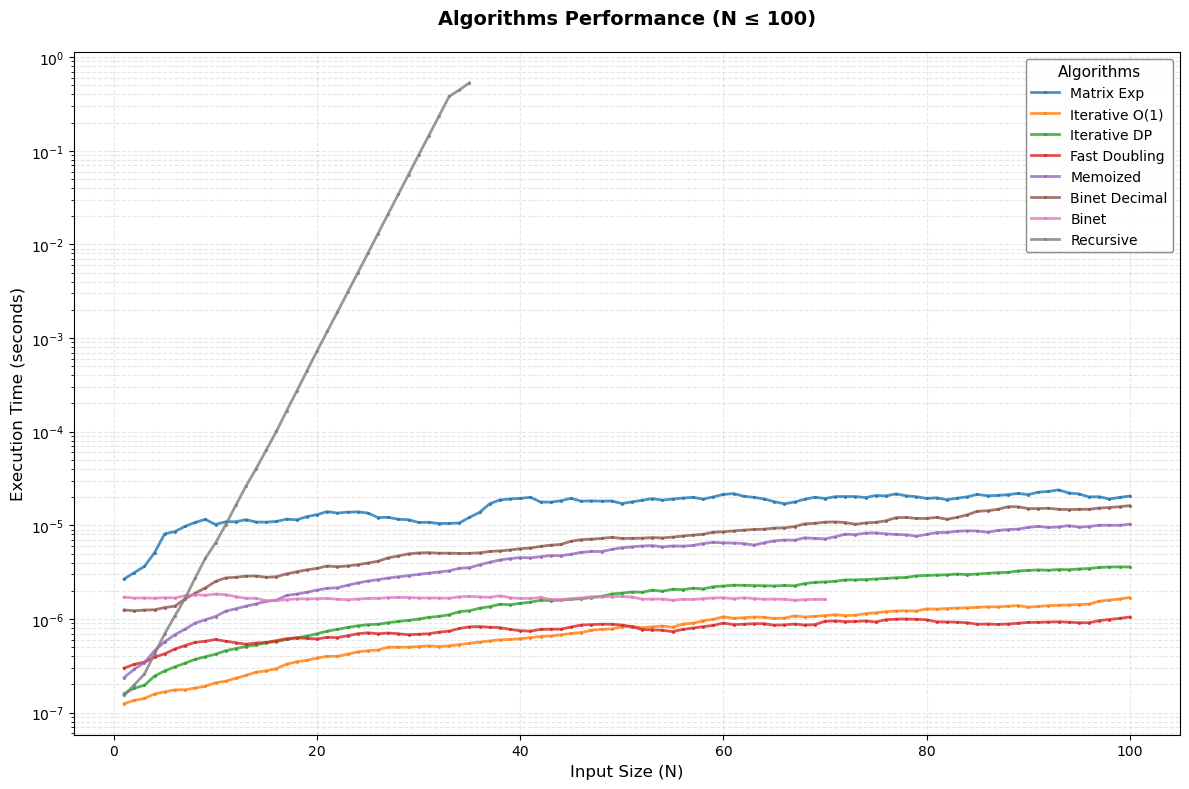

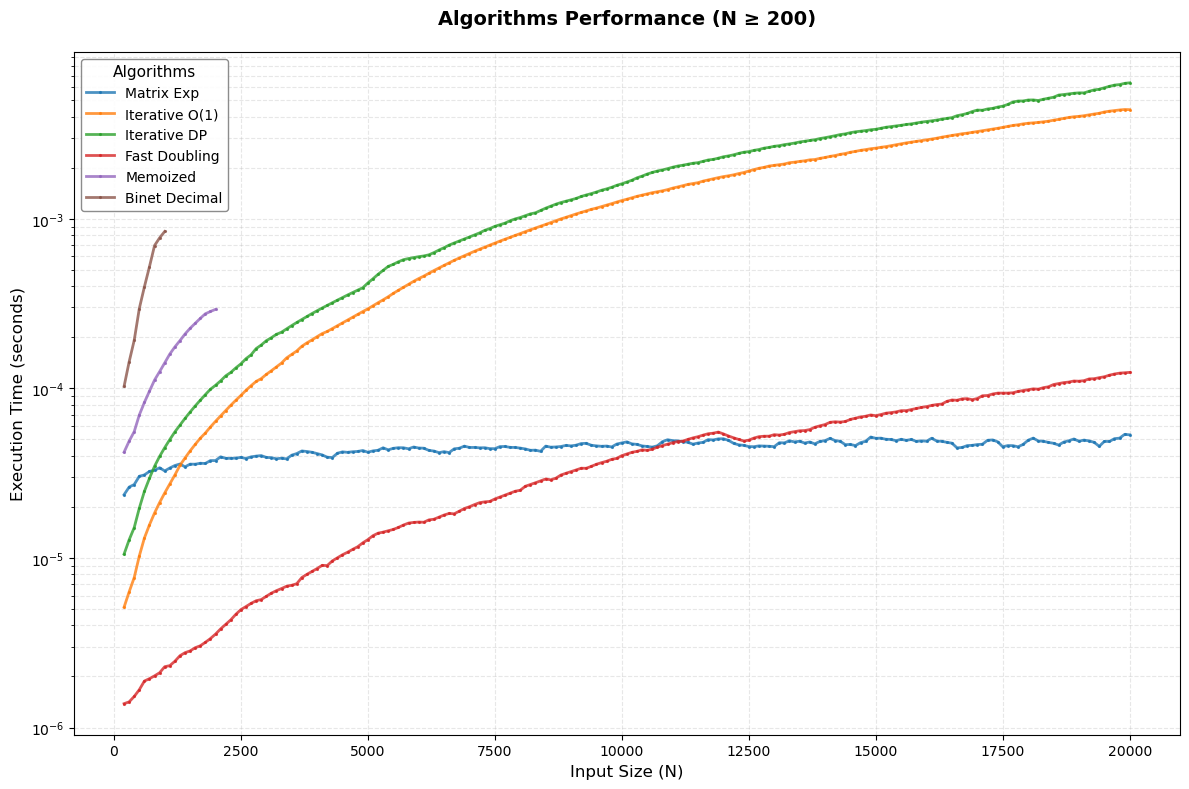

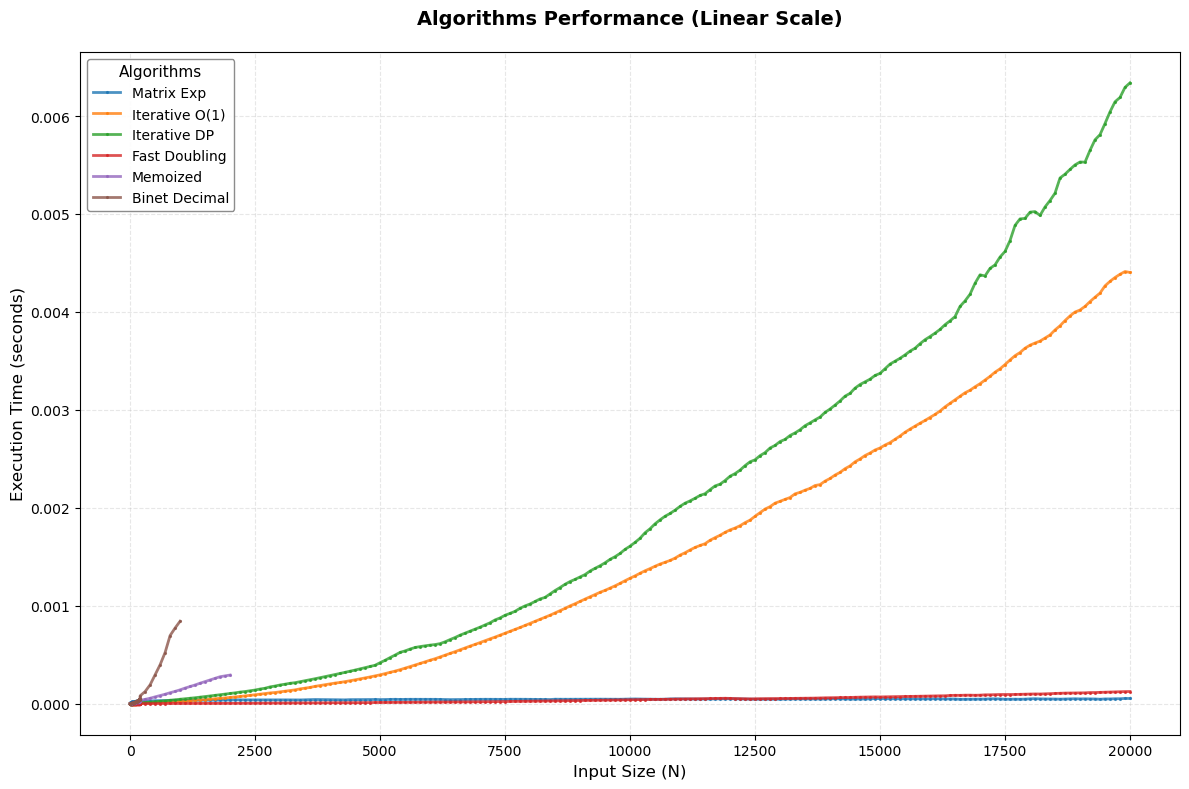

In [30]:
# Generate and save the plots
plot_fibonacci_performance(df_results, plots_path)

## **6. Conclusion**

This study empirically analyzed eight different algorithms for computing the Fibonacci sequence and compared their performance characteristics. The key findings and recommendations based on the results are summarized below.

### **6.1 Key Findings**

The empirical analysis of Fibonacci computation methods highlights significant performance variations:

- 🚀 **Recursive Approach**: Highly inefficient due to exponential time complexity $O(2^n)$, making it impractical for large $n$.
- 🛠 **Memoization & Iterative DP**: Both offer linear time complexity $O(n)$ and effectively reduce redundant calculations, making them suitable for moderate input sizes.
- ⚡ **Matrix Exponentiation**: The most efficient method for large $n$, achieving logarithmic complexity $O(\log n)$.
- 🔢 **Binet’s Formula**: The fastest method in theory but unreliable for large $n$ due to floating-point precision errors.
- 🎯 **Optimized Iterative Approach $O(1)$ Space**: Provides a balance between speed and memory efficiency, making it a practical choice for real-world applications.
- 🔄 **Fast Doubling Method**: Achieves logarithmic time complexity $O(\log n)$, making it highly efficient for large $n$.

### **6.2 Choosing the Optimal Algorithm**

The table below outlines the best algorithm based on different use cases:

| **Use Case**                   | **Recommended Algorithm**              | **Rationale**                                        |
|--------------------------------|----------------------------------------|------------------------------------------------------|
| **Small $(n \leq 30)$**        | Recursive (for learning purposes)      | Simple and educational, but inefficient              |
| **Moderate $(n < 10^5)$**      | Memoization (Top-Down DP)              | Eliminates redundant computations, runs in $O(n)$    |
| **Large $(n < 10^6)$**         | Iterative DP or Optimized Iterative    | Efficient, avoids recursion overhead                 |
| **Very Large $(n > 10^6)$**    | Matrix Exponentiation or Fast Doubling | Fastest for extremely large $n$, runs in $O(\log n)$ |
| **Quick Approximation Needed** | Binet’s Formula (for small $n$ only)   | Instantaneous but unreliable for large $n$           |

### **6.3 Final Remarks**

This study underscores the importance of **choosing the right algorithm based on problem constraints**. While **recursive methods** are useful for learning, they become impractical for large input sizes. **Memoization and Iterative DP** improve efficiency but remain **linear in complexity**. **Matrix Exponentiation** and **Fast Doubling** provide the best trade-off between speed and scalability for extremely large numbers.

---